In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../output/delito-por-barrio.csv")

In [3]:
df

,Name,Accidente Vehicular,Agresión,Drogas,Extorsión,Fraude,Homicidio,Incendio,Robo,Secuestro,Vandalismo
0,Abel Gilbert,2.0,2.0,0.0,0.0,0.0,4.0,0.0,9.0,0.0,0.0
1,Alborada,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
2,Atarazana,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Balerio Estacio,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,Barrio Lindo,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
71,Sopeña,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,Urdenor,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
73,Urdesa,4.0,3.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,1.0
74,Valdivia,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X = df.iloc[:,1:]

In [5]:
sc = StandardScaler()

In [6]:
sc.fit(X)

StandardScaler()

In [7]:
X_norm = sc.transform(X)

In [8]:
X_norm

array([[ 2.16548650e-01,  5.72946313e-01, -1.15470054e-01,
        -2.92770022e-01, -2.35702260e-01,  1.42008638e+00,
        -3.44592319e-01,  1.69862413e+00, -1.90692518e-01,
        -3.60886196e-01],
       [-1.94893785e-01, -6.36607014e-01, -1.15470054e-01,
        -2.92770022e-01, -2.35702260e-01,  3.92214334e-01,
        -3.44592319e-01, -2.91834101e-01, -1.90692518e-01,
        -3.60886196e-01],
       [ 6.27991084e-01, -6.36607014e-01, -1.15470054e-01,
        -2.92770022e-01, -2.35702260e-01, -6.35657713e-01,
        -3.44592319e-01, -8.60536452e-01, -1.90692518e-01,
        -3.60886196e-01],
       [-6.06336219e-01,  5.72946313e-01, -1.15470054e-01,
        -2.92770022e-01, -2.35702260e-01,  3.92214334e-01,
        -3.44592319e-01, -8.60536452e-01, -1.90692518e-01,
        -3.60886196e-01],
       [ 1.45087595e+00, -3.18303507e-02, -1.15470054e-01,
        -2.92770022e-01, -2.35702260e-01, -6.35657713e-01,
        -3.44592319e-01, -5.76185277e-01, -1.90692518e-01,
        -3.

In [9]:
X_norm.shape

(76, 10)

In [10]:
clusters = np.arange(1,75,10)

In [11]:
clusters

array([ 1, 11, 21, 31, 41, 51, 61, 71])

In [12]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [13]:
eva = pd.DataFrame({"K":clusters, "inercia":inercias})

In [14]:
eva

,K,inercia
0,1,7.600000e+02
1,11,1.565399e+02
2,21,4.107989e+01
3,31,1.280002e+01
4,41,4.825813e+00
5,51,9.578781e-01
6,61,3.227859e-31
7,71,1.675559e-31


<Axes: xlabel='K', ylabel='inercia'>

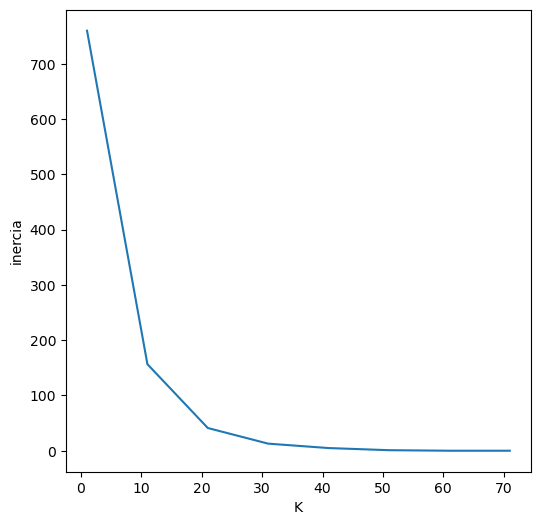

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(data = eva, x = "K", y = "inercia")

In [16]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [17]:
kmeans.fit(X_norm)

C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, random_state=0)

In [18]:
kmeans.cluster_centers_

array([[-0.37122626, -0.11822702, -0.11547005, -0.29277002, -0.23570226,
        -0.26856055,  2.37634444, -0.69805007, -0.19069252, -0.3608862 ],
       [-0.30528078, -0.47434986, -0.11547005, -0.29277002, -0.23570226,
        -0.44763234, -0.34459232, -0.47215436, -0.19069252, -0.32153562],
       [ 2.68520326,  0.57294631,  8.66025404, -0.29277002, -0.23570226,
        -0.12172169, -0.34459232,  3.40473118, -0.19069252,  2.86586097],
       [-0.50347561,  0.42175215, -0.11547005,  3.41565026, -0.23570226,
         0.77766635, -0.34459232,  0.77448281, -0.19069252,  0.44580059],
       [ 0.62799108,  3.89921796, -0.11547005, -0.29277002, -0.23570226,
         2.70492644,  0.84581751,  1.41427295, -0.19069252,  2.05917418],
       [ 0.65737983,  0.40015298, -0.11547005, -0.29277002, -0.23570226,
         0.3187949 , -0.34459232,  0.60184102,  0.06810447, -0.13040426],
       [-0.19489378, -0.03183035, -0.11547005,  3.41565026, -0.23570226,
        -0.12172169, -0.34459232,  3.12038001

In [19]:
df["cluster"] = kmeans.labels_

In [20]:
df.head()

,Name,Accidente Vehicular,Agresión,Drogas,Extorsión,Fraude,Homicidio,Incendio,Robo,Secuestro,Vandalismo,cluster
0,Abel Gilbert,2.0,2.0,0.0,0.0,0.0,4.0,0.0,9.0,0.0,0.0,5
1,Alborada,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1
2,Atarazana,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Balerio Estacio,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1
4,Barrio Lindo,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5


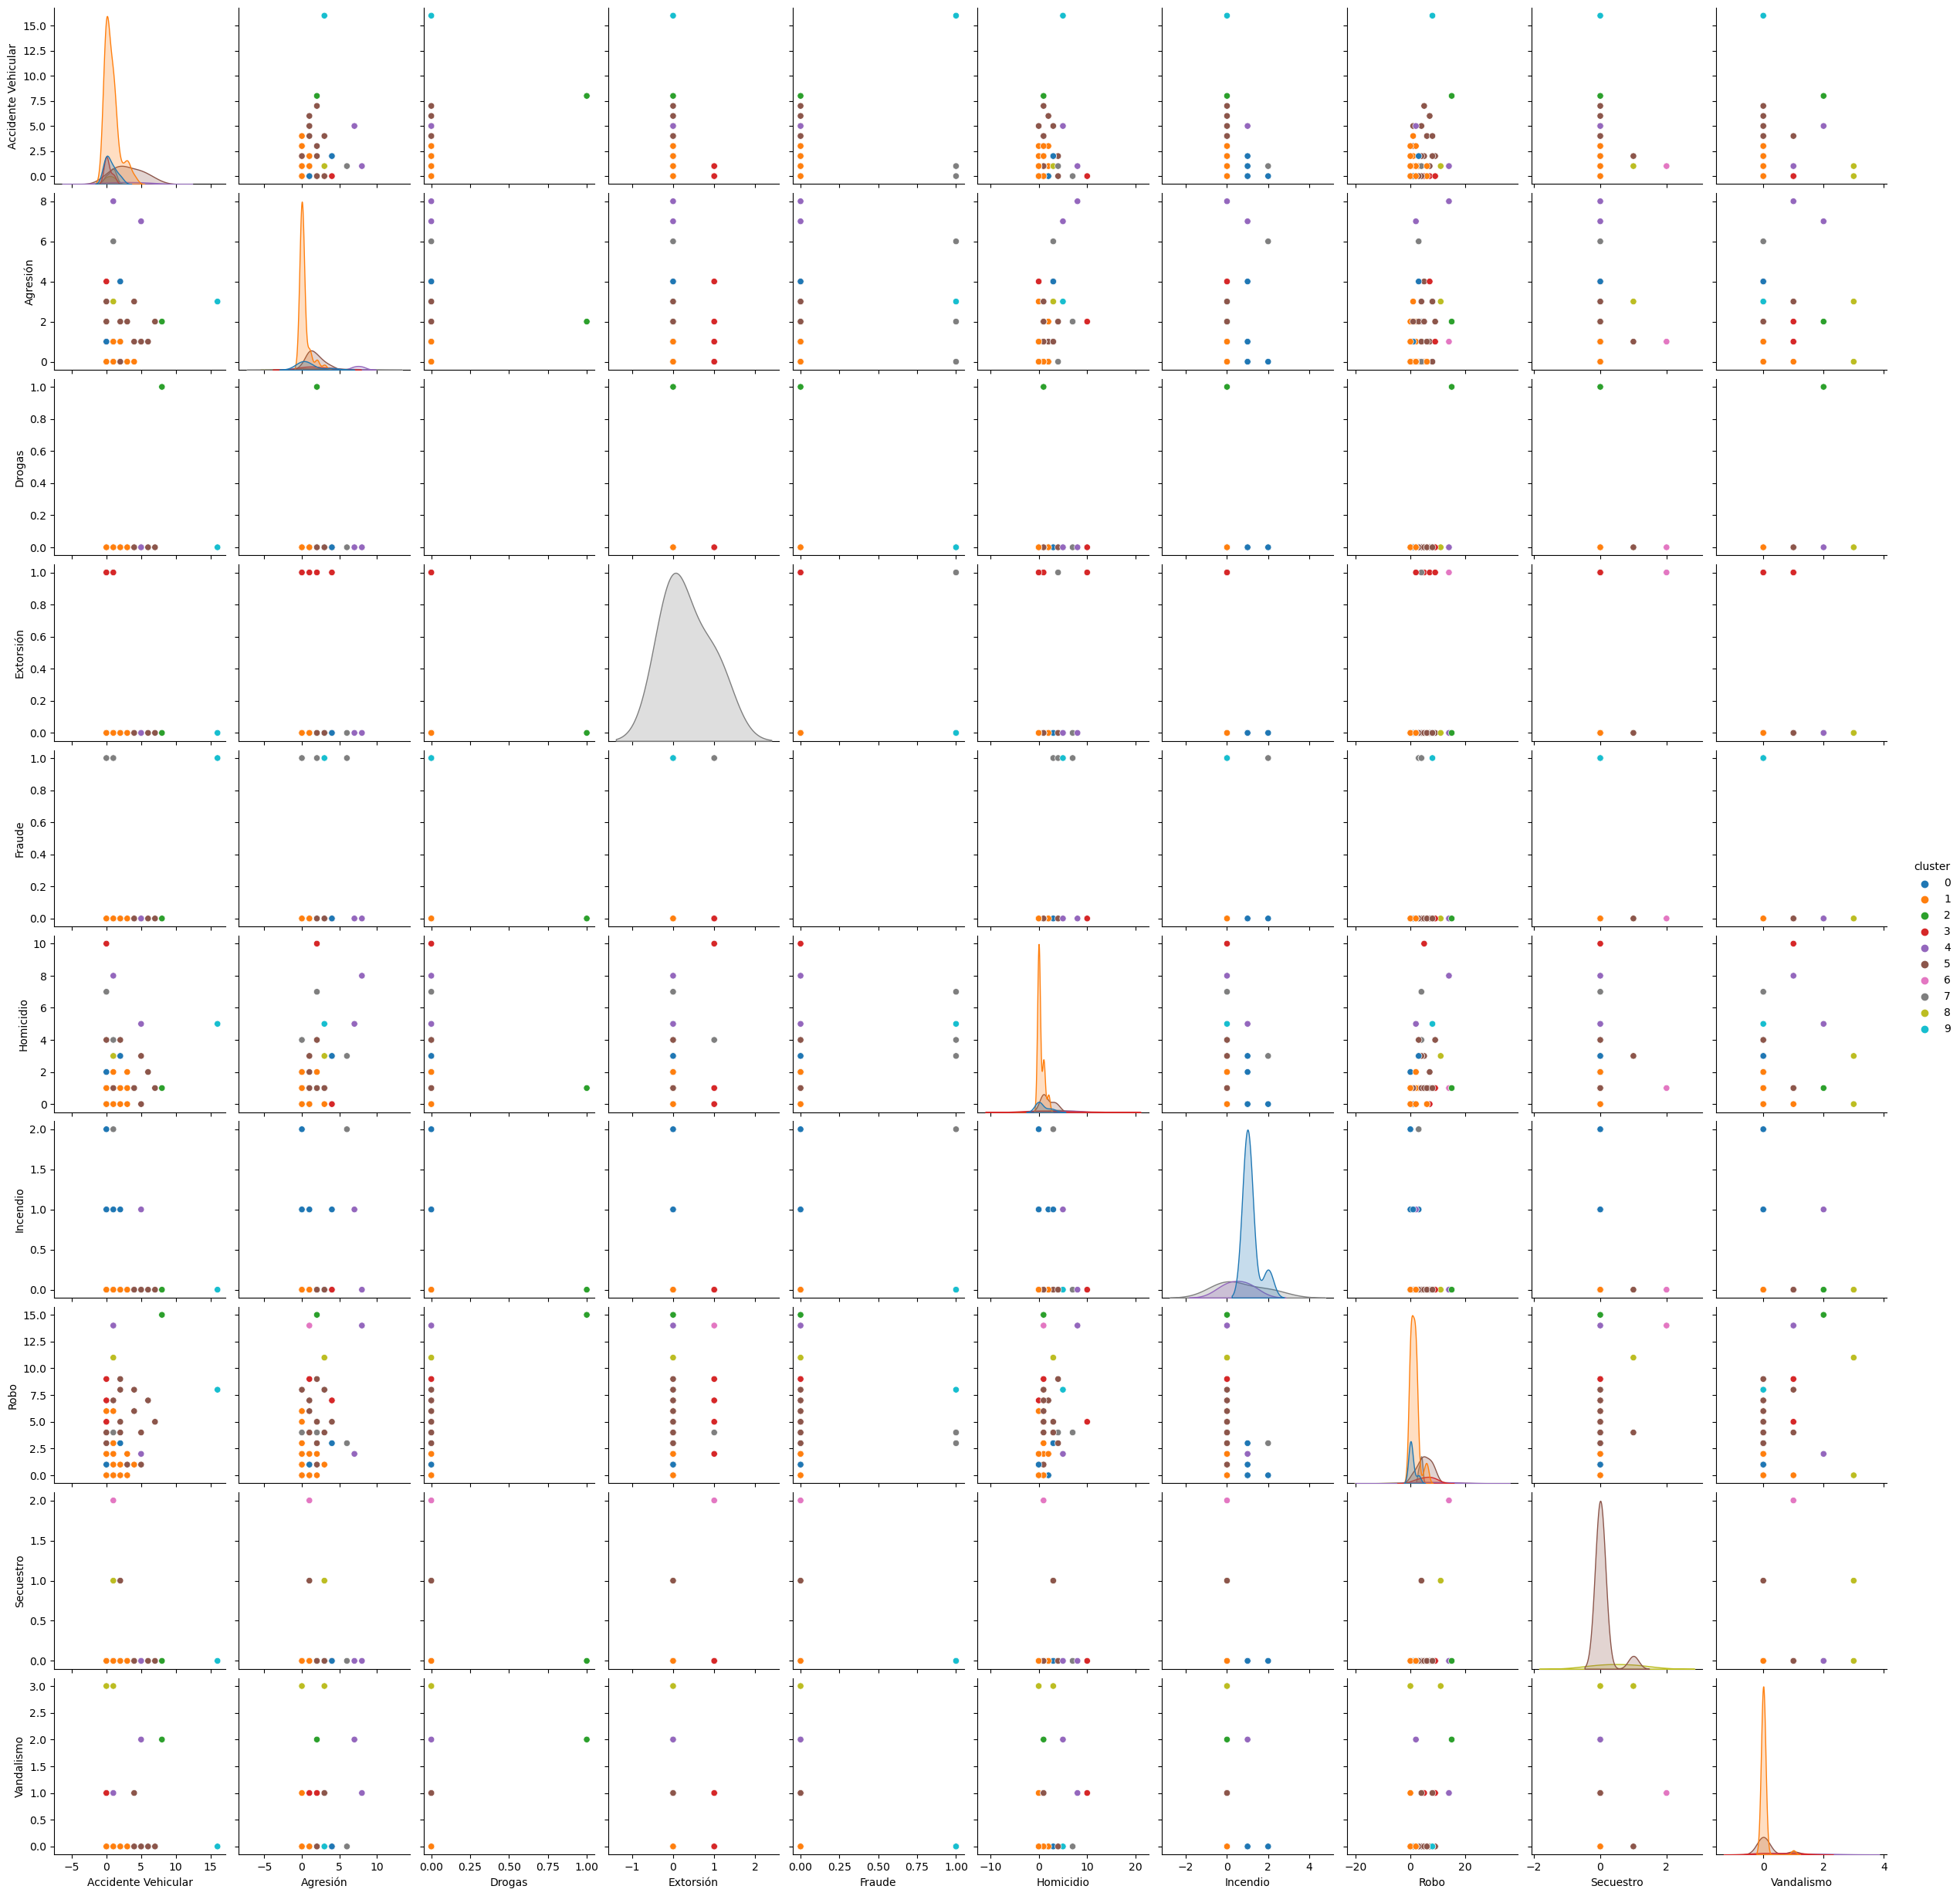

In [21]:
sns.pairplot(df,hue="cluster", palette="tab10")

In [22]:
df.loc[df["cluster"]==0]

,Name,Accidente Vehicular,Agresión,Drogas,Extorsión,Fraude,Homicidio,Incendio,Robo,Secuestro,Vandalismo,cluster
22,Estero Salado,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
45,Martha de Roldos,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
46,Monte Sinai,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0
50,Nueva Prosperina,2.0,4.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0
54,Parroquia Bolivar,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
56,Parroquia Letamendi,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0
68,San Felipe,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


In [23]:
df.loc[df["cluster"]==1]

,Name,Accidente Vehicular,Agresión,Drogas,Extorsión,Fraude,Homicidio,Incendio,Robo,Secuestro,Vandalismo,cluster
1,Alborada,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1
2,Atarazana,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Balerio Estacio,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1
5,Barrio Orellana,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
8,Bellavista,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
10,Centenario,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1
11,Cerro del Carmen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
12,Ciudadela 9 de Octubre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1
13,Ciudadela Caracol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
14,Ciudadela La FAE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1


In [24]:
df.loc[df["cluster"]==2]

,Name,Accidente Vehicular,Agresión,Drogas,Extorsión,Fraude,Homicidio,Incendio,Robo,Secuestro,Vandalismo,cluster
58,Parroquia Rocafuerte,8.0,2.0,1.0,0.0,0.0,1.0,0.0,15.0,0.0,2.0,2


In [25]:
df.loc[df["cluster"]==3]

,Name,Accidente Vehicular,Agresión,Drogas,Extorsión,Fraude,Homicidio,Incendio,Robo,Secuestro,Vandalismo,cluster
24,Flor de Bastion,0.0,2.0,0.0,1.0,0.0,10.0,0.0,5.0,0.0,1.0,3
30,Guasmo Norte - Rio Guayas,0.0,4.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,0.0,3
48,Mucho Lote,0.0,1.0,0.0,1.0,0.0,1.0,0.0,9.0,0.0,1.0,3
57,Parroquia Pedro Carbo,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,3


In [26]:
df.loc[df["cluster"]==2]

,Name,Accidente Vehicular,Agresión,Drogas,Extorsión,Fraude,Homicidio,Incendio,Robo,Secuestro,Vandalismo,cluster
58,Parroquia Rocafuerte,8.0,2.0,1.0,0.0,0.0,1.0,0.0,15.0,0.0,2.0,2


<Axes: xlabel='cluster', ylabel='Agresión'>

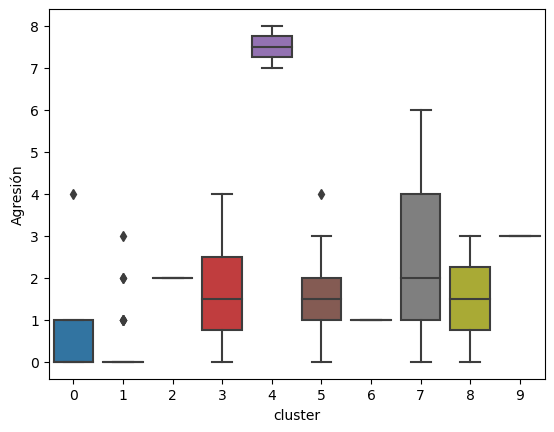

In [27]:
sns.boxplot(x="cluster", y="Agresión", data=df)